# Especialização em Inteligência Artificial – IFMG
## Trabalho da disciplina de Aprendizado de Máquina
**Autor**: Alexandre Fortes Santana

**Professor**: Professor Frederico Gadelha Guimarães - DCC – UFMG

## Orientações trabalho final

Para cada base de dados, efetuar o pipeline completo de aprendizado de máquina para os seguintes métodos: K-NN, Naive Bayes, Árvore de decisão.

Separar seus dados em conjuntos de treinamento e teste, utilizando alguma metodologia vista em aula para a partição: hold-out, k-fold cross validation, etc.

Discutir os resultados obtidos quanto ao desempenho estimado e comparar os diferentes métodos.

# Dataset 2: Stroke Prediction Dataset

Dataset disonível em: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### About Dataset  

#### Context  
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.  
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.  

#### Attribute Information 
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [4]:
import pandas as pd

# Carregar o conjunto de dados
df = pd.read_csv('StrokePredictionDataset/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Análise exploratória

In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [24]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


1. **Distribuição de idade, nível médio de glicose no sangue e índice de massa corporal (bmi):**

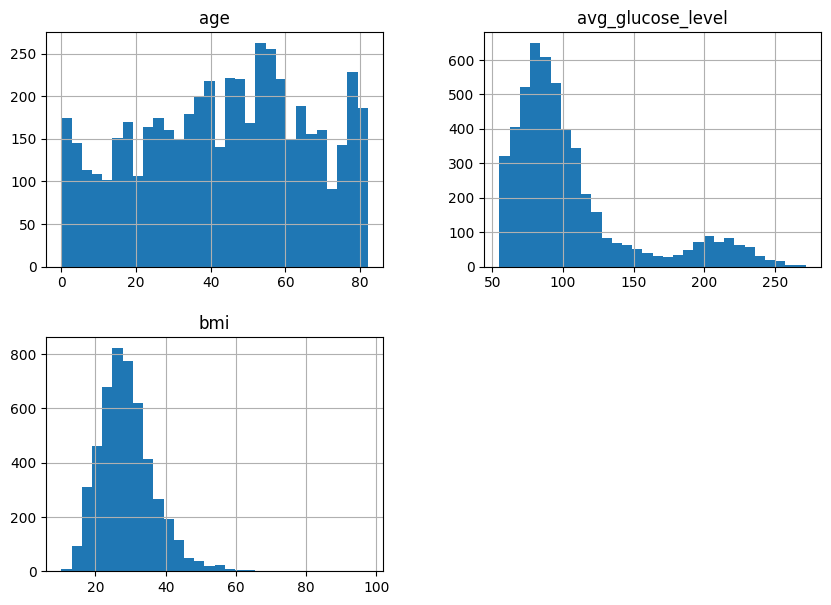

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

df[['age', 'avg_glucose_level', 'bmi', ]].hist(bins=30, figsize=(10, 7))
plt.show()

2. **Contagem de pacientes com AVC e sem AVC:**

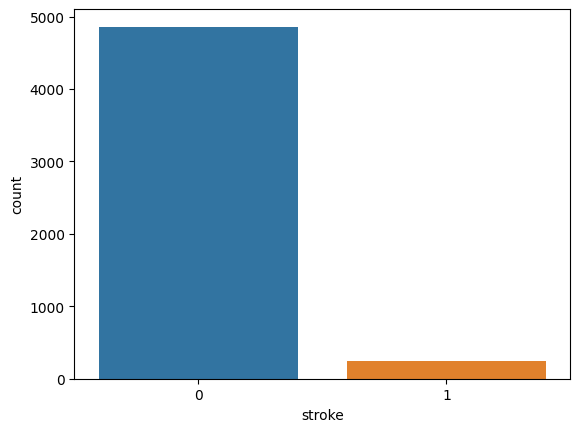

In [8]:
sns.countplot(x='stroke', data=df)
plt.show()

3. **Contagem de pacientes com base no tipo de trabalho e AVC:**

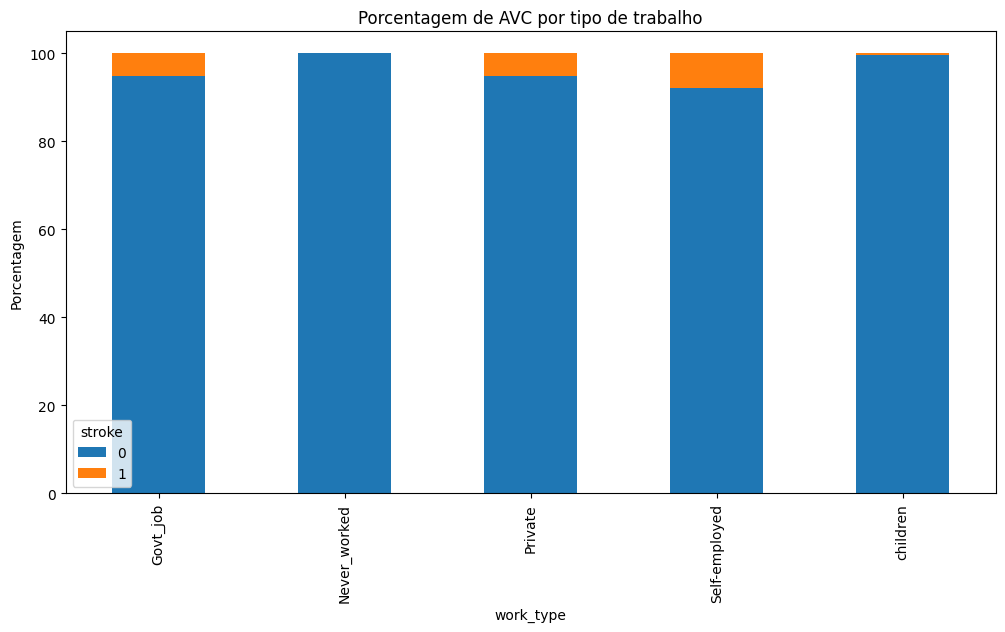

In [40]:
# Cria uma tabela de contingência
stroke_worktype = pd.crosstab(df['work_type'], df['stroke'], normalize='index')

# Multiplica por 100 para obter porcentagens
stroke_worktype *= 100

# Plot o gráfico de barras empilhadas
stroke_worktype.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.ylabel('Porcentagem')
plt.title('Porcentagem de AVC por tipo de trabalho')
plt.show()

4. **Comparação da distribuição de idade entre pacientes com e sem AVC:**

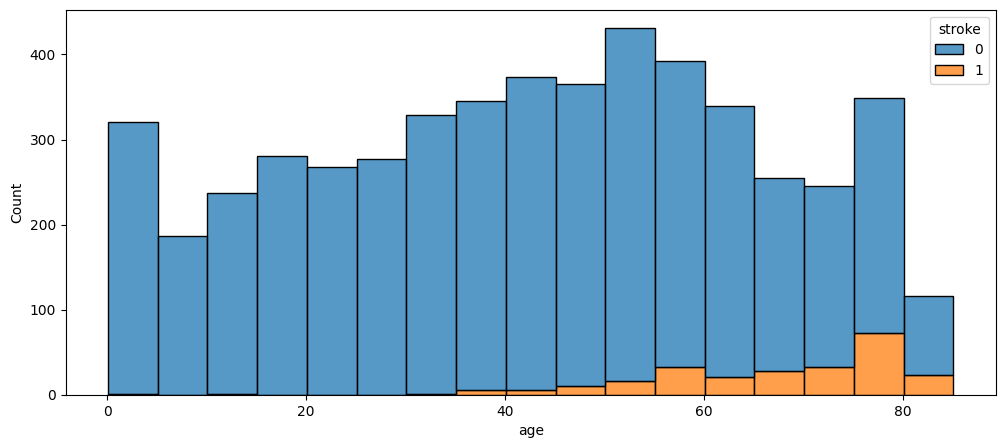

In [14]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='age', hue='stroke', multiple='stack', binwidth=5)
plt.show()

5. **Relação entre hipertensão, doença cardíaca e AVC:**

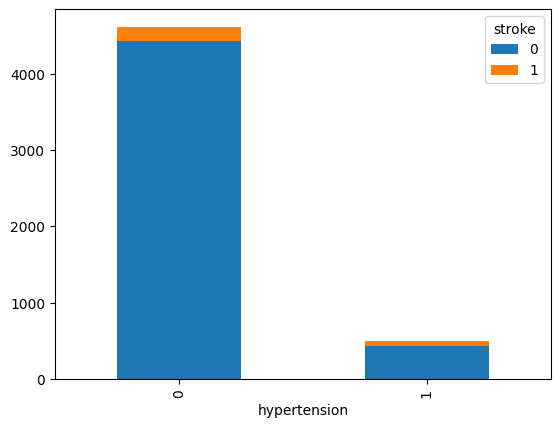

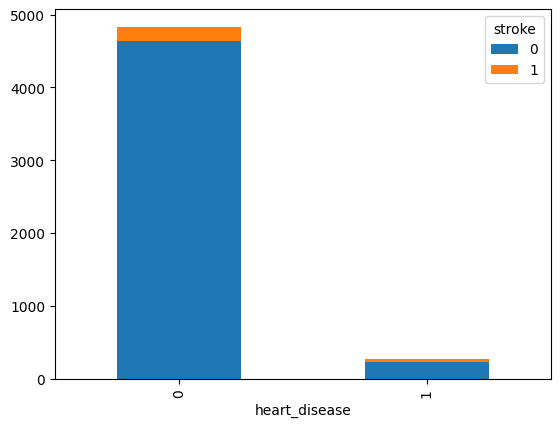

In [15]:
pd.crosstab(df['hypertension'], df['stroke']).plot(kind='bar', stacked=True)
pd.crosstab(df['heart_disease'], df['stroke']).plot(kind='bar', stacked=True)
plt.show()

6. **Relação entre massa corpórea (IMC) e AVC:**

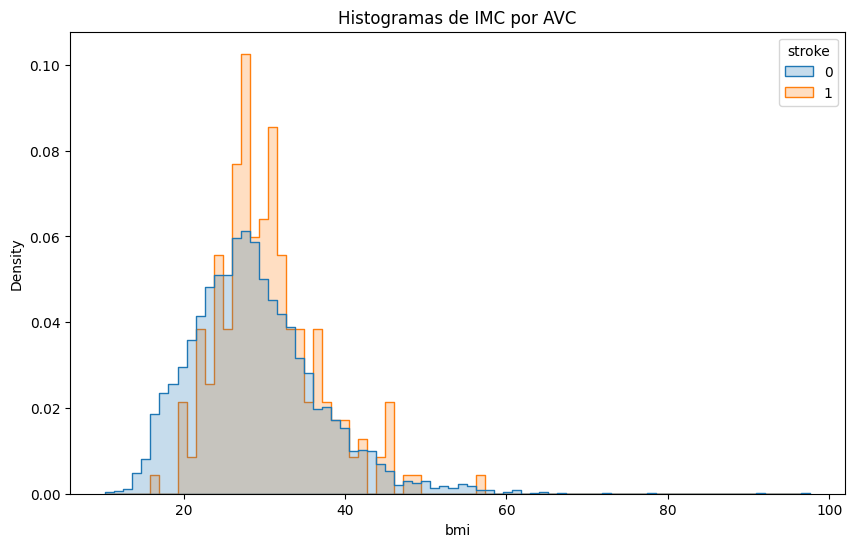

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bmi', hue='stroke', element='step', stat='density', common_norm=False)
plt.title('Histogramas de IMC por AVC')
plt.show()

7. **Contagem de pacientes com AVC por gênero**

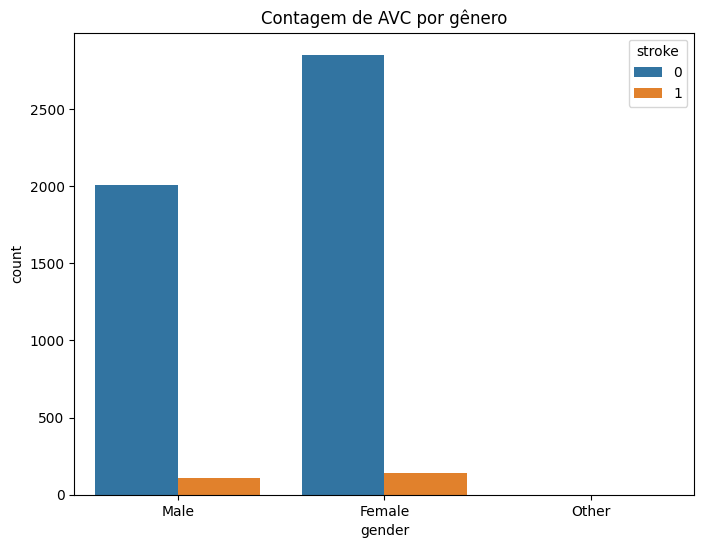

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Contagem de AVC por gênero')
plt.show()

8. **Contagem de pacientes com AVC por status de fumante**

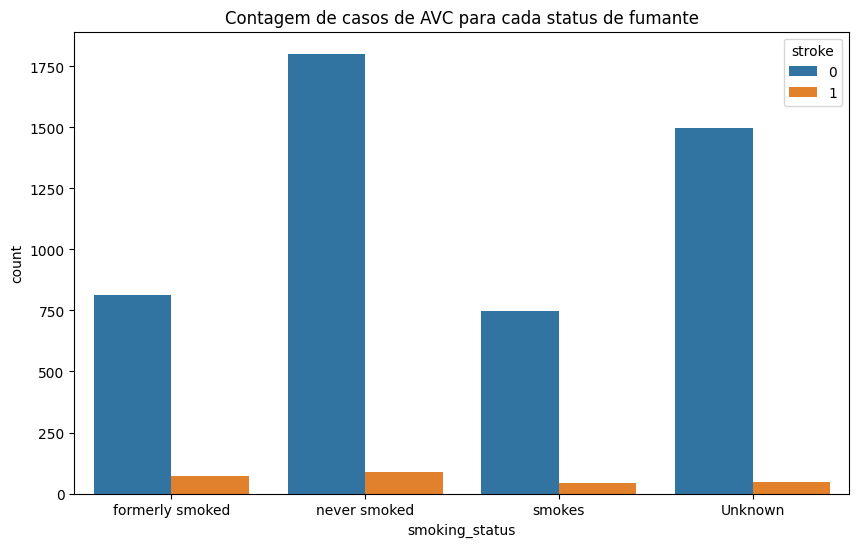

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title('Contagem de casos de AVC para cada status de fumante')
plt.show()


9. **Balanceamento de classes**

In [42]:
# Contar o número de observações em cada classe
class_counts = df['stroke'].value_counts()

print(class_counts)

stroke
0    4861
1     249
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix





# Pré-processamento
le = LabelEncoder()
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for i in categorical_features:
    df[i] = le.fit_transform(df[i])

# Dividir os dados em recursos (X) e alvo (y)
X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# K-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Árvore de decisão
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Comparar desempenho
print("K-NN Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Naive Bayes Accuracy: ", accuracy_score(y_test, y_pred_nb))
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred_dt))
